In [41]:
import numpy as np
import os
import pandas as pd
import csv
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_distances
from sklearn.manifold import MDS
import warnings
warnings.filterwarnings('ignore')

In [42]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'];


### load data (Combined with train and test dat)

In [43]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [44]:
data_batch_1 = unpickle("/Users/poonl/CS498-AML/hw3/data/data_batch_1")
data_batch_2 = unpickle("/Users/poonl/CS498-AML/hw3/data/data_batch_2")
data_batch_3 = unpickle("/Users/poonl/CS498-AML/hw3/data/data_batch_3")
data_batch_4 = unpickle("/Users/poonl/CS498-AML/hw3/data/data_batch_4")
data_batch_5 = unpickle("/Users/poonl/CS498-AML/hw3/data/data_batch_5")
test_batch = unpickle("/Users/poonl/CS498-AML/hw3/data/test_batch")


### (1a) Mean image 

In [47]:
sum_mean = np.zeros((10,3072))
count = np.zeros(10)
#sum over all the image data for each category 
for i in range (0, 10000):
    sum_mean[data_batch_1[b'labels'][i]] += data_batch_1[b'data'][i]
    count[data_batch_1[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_2[b'labels'][i]] += data_batch_2[b'data'][i]
    count[data_batch_2[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_3[b'labels'][i]] += data_batch_3[b'data'][i]
    count[data_batch_3[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_4[b'labels'][i]] += data_batch_4[b'data'][i]
    count[data_batch_4[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[data_batch_5[b'labels'][i]] += data_batch_5[b'data'][i]
    count[data_batch_5[b'labels'][i]] += 1
for i in range (0, 10000):
    sum_mean[test_batch[b'labels'][i]] += test_batch[b'data'][i]
    count[test_batch[b'labels'][i]] += 1

In [49]:
mean = sum_mean

In [50]:
#devide by the number of picture it has in that category to get the mean image 
for i in range (0, 10):
    mean[i]=sum_mean[i]/count[i]

In [51]:
%matplotlib inline

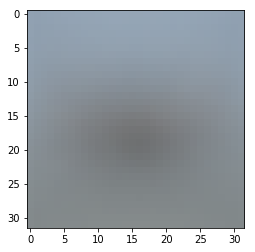

In [52]:
image = np.reshape(mean[0],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

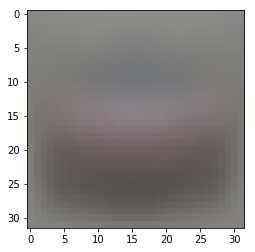

In [53]:
image = np.reshape(mean[1],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

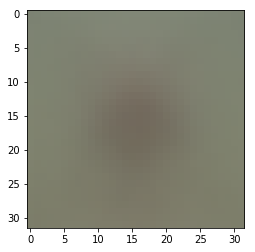

In [54]:
image = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

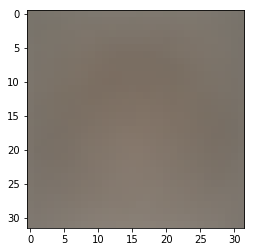

In [55]:
image = np.reshape(mean[3],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

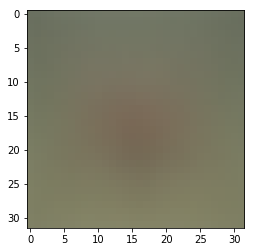

In [56]:
image = np.reshape(mean[4],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

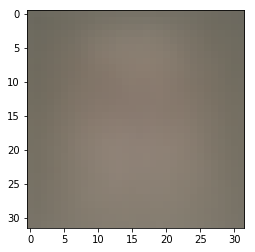

In [57]:
image = np.reshape(mean[5],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

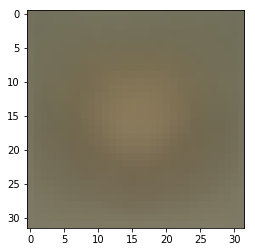

In [58]:
image = np.reshape(mean[6],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

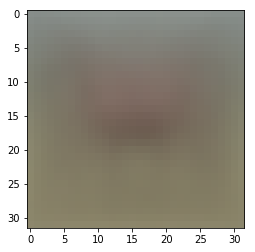

In [59]:
image = np.reshape(mean[7],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

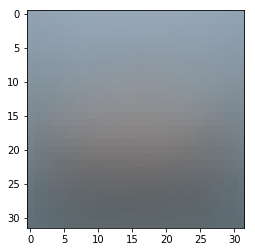

In [60]:
image = np.reshape(mean[8],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

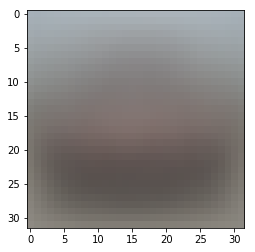

In [61]:
image = np.reshape(mean[9],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

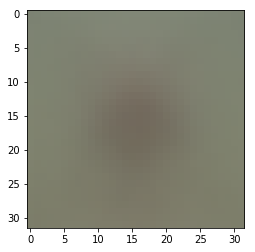

In [62]:
im = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(im)
pyplot.show()



### (1b) Constructing with first 20 principal components

In [65]:
data_by_labels = [] #storing the image by labels, the list would be in this structure: data_by_labels[labes][row number of image][image data array]
temp_count_loop = np.zeros(10) #counter for 
size = 6000 # we have counted there are 6000 images for each class

for i in range (0,10): #building list of image classes
    data_by_labels.append(np.zeros((size, 3072)))

In [66]:
#move data from data to data_by_labels so data is now by labels for PCA training
# row = class index ; col = i_th data item in that category
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_1[b'labels'][i]])
    if idx_cat < size: #making sure the index wont exceed array size (for testing)
        data_by_labels[data_batch_1[b'labels'][i]][idx_cat] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_1[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_2[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_2[b'labels'][i]][idx_cat] += data_batch_2[b'data'][i]
    temp_count_loop[data_batch_2[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_3[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_3[b'labels'][i]][idx_cat] += data_batch_3[b'data'][i]
    temp_count_loop[data_batch_3[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_4[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_4[b'labels'][i]][idx_cat] += data_batch_4[b'data'][i]
    temp_count_loop[data_batch_4[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[data_batch_5[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[data_batch_5[b'labels'][i]][idx_cat] += data_batch_5[b'data'][i]
    temp_count_loop[data_batch_5[b'labels'][i]] += 1
for i in range (0,10000):
    idx_cat = int(temp_count_loop[test_batch[b'labels'][i]])
    if idx_cat < size: 
        data_by_labels[test_batch[b'labels'][i]][idx_cat] += test_batch[b'data'][i]
    temp_count_loop[test_batch[b'labels'][i]] += 1

In [67]:
#fit pca on each labels
pca_objs = [PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20)]
for i in range(0,10):
    pca_objs[i].fit(data_by_labels[i])


1


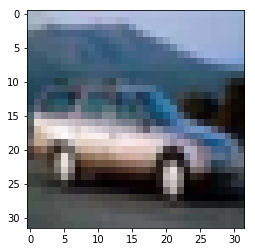

In [68]:
#show the orgainl image and the category number
image = np.reshape(data_batch_1[b'data'][4],(3,32,32)).transpose(1,2,0).astype('uint8')
print(data_batch_1[b'labels'][4])
plt.imshow(image)
pyplot.show()

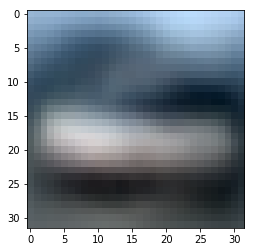

In [69]:
#after applying PCA
reshaped_4th = data_batch_1[b'data'][4].reshape(1,-1) 
apply_pca = pca_objs[1].transform(reshaped_4th)
apply_pca_2 = pca_objs[1].inverse_transform(apply_pca)
apply_pca_3 = np.reshape(apply_pca_2,(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(apply_pca_3)
pyplot.show()

In [70]:
#Using option 2 to calculate average error 

In [71]:
###Error for each labels
error_by_labels = [] #storing the image by labels, the list would be in this structure: error_by_labels[labes][image data array]
temp_count_loop = np.zeros(10)
mean_loop = np.zeros(10)


for i in range (0,10000):
    getLabelbyObj = data_batch_1[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_1[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_2[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_2[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_3[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_3[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_4[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_4[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = data_batch_5[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = data_batch_5[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1
for i in range (0,10000):
    getLabelbyObj = test_batch[b'labels'][i]
    getPCAbyLabel = pca_objs[getLabelbyObj]
    img_data = test_batch[b'data'][i].reshape(1,-1)
    temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
    temp2 = getPCAbyLabel.inverse_transform(temp)
    error_temp = img_data-temp2 #subtract to get error
    sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
    mean_loop[getLabelbyObj] =  mean_loop[getLabelbyObj] + sqrsum
    temp_count_loop[getLabelbyObj] += 1

In [72]:
#print error
avg_erro_by_labels = np.zeros(10)
for i in range (0,10):
    avg_erro_by_labels[i] = mean_loop[i]/6000 #again, we are assuming each class has 6000 images for simplicity in code
    print(avg_erro_by_labels[i])

2620513.319108535
3950692.9251901647
2447700.287106346
3116495.0292740604
2180394.8091818294
3231131.7146467185
2630248.581784896
3441110.2108379025
2440642.7079096446
4021109.107898354


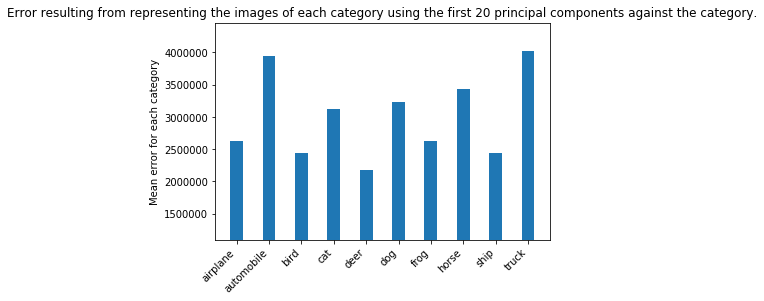

In [73]:
#ploting error in each category 
import random
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
indx = np.arange(1,20,2)

err_blks = plt.bar(indx, avg_erro_by_labels)
 
ax.set_xticks(indx)
ax.set_xticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation = 45, ha="right")
ax.set_ylim([min(avg_erro_by_labels)*0.5, max(avg_erro_by_labels)*1.11])
ax.set_ylabel('Mean error for each category')
ax.set_title('Error resulting from representing the images of each category using the first 20 principal components against the category.')
plt.show(block=False)



### 2:  distances between mean image

In [74]:
#euclidean_distances(np.reshape(mean[0],(3,1024)),np.reshape(mean[1],(3,1024)))
test = paired_distances(mean[1].reshape(1,-1),mean[0].reshape(1,-1))


In [75]:
euc_dis = np.zeros((10,10))        
for i in range(0,10):
    for j in range(0,10):
        euc_dis[i][j] = euclidean_distances(mean[i].reshape(1,-1),mean[j].reshape(1,-1))

In [76]:
# distance matrix calculated by L2 norm required for part 2 
print(euc_dis)

[[2.99009978e-04 1.68363535e+03 1.60502435e+03 1.90553526e+03
  2.14876341e+03 1.96522149e+03 2.44567973e+03 1.66364593e+03
  9.45541104e+02 1.44909491e+03]
 [1.68363535e+03 0.00000000e+00 8.86236750e+02 1.02764978e+03
  1.14308137e+03 1.21607943e+03 1.19119200e+03 9.50786078e+02
  1.30346655e+03 9.49995771e+02]
 [1.60502435e+03 8.86236750e+02 0.00000000e+00 5.17311502e+02
  6.01250335e+02 7.01468226e+02 9.13747516e+02 4.18276306e+02
  1.55771502e+03 1.41667473e+03]
 [1.90553526e+03 1.02764978e+03 5.17311502e+02 0.00000000e+00
  4.69791716e+02 4.12181669e+02 6.77491969e+02 5.96376737e+02
  1.85121450e+03 1.67646786e+03]
 [2.14876341e+03 1.14308137e+03 6.01250335e+02 4.69791716e+02
  0.00000000e+00 6.17697141e+02 4.60510929e+02 6.84346911e+02
  2.06562166e+03 1.83074085e+03]
 [1.96522149e+03 1.21607943e+03 7.01468226e+02 4.12181669e+02
  6.17697141e+02 0.00000000e+00 8.28581051e+02 8.43672091e+02
  1.89759182e+03 1.88024377e+03]
 [2.44567973e+03 1.19119200e+03 9.13747516e+02 6.77491969e

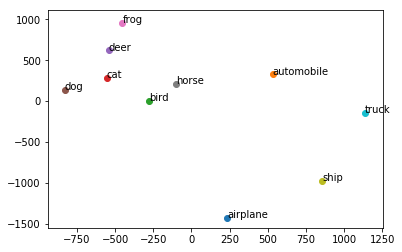

In [77]:
#plot the result
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(euc_dis)
xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, labels):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()

### 3  average error obtained by PCA

For class A and class B, define E(A | B) to be the average error obtained by representing all the images of class A using the mean of class A and the first 20 principal components of class B. Now define the similarity between classes to be (1/2)(E(A | B) + E(B | A)). If A and B are very similar, then this error should be small, because A's principal components should be good at representing B.

In [78]:
#data structure to store distances
dist_classes = np.zeros((10,10))

for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_1[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_1[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_2[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_2[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum            
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_3[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_3[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_4[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_4[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = data_batch_5[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = data_batch_5[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum
for i in range(10000): 
    for class_label in range(10):
        getLabelbyObj = test_batch[b'labels'][i]
        getPCAbyLabel = pca_objs[class_label]
        img_data = test_batch[b'data'][i].reshape(1,-1)
        temp = getPCAbyLabel.transform(img_data) #apply PCA on that image
        temp2 = getPCAbyLabel.inverse_transform(temp)
        error_temp = img_data-temp2 #subtract to get error
        sqrsum = np.sum(np.square(error_temp)) # Square those differences individually and sum them over the whole image.
        dist_classes[getLabelbyObj][class_label] = dist_classes[getLabelbyObj][class_label] + sqrsum
        dist_classes[class_label][getLabelbyObj] = dist_classes[class_label][getLabelbyObj] + sqrsum

dist_classes = (dist_classes / 6000) / 2 #E(A|B) = Average error of one class (6000 images), and each matrix entry stores the average of 2 difference class average error

In [79]:
# 10 x 10 matrix requited for part 3 
print(dist_classes)

[[2620513.31910851 3765263.72482817 2812070.46621585 3332052.06860216
  2573709.08648721 3434991.39035774 3015350.62373824 3416927.28394457
  2733154.70995142 3843214.55891384]
 [3765263.72482817 3950692.92519019 3769552.55317455 4074731.36436302
  3542961.47280071 4250212.61825153 3776667.02873286 4318665.24677164
  3520359.37697355 4155760.71610775]
 [2812070.46621585 3769552.55317455 2447700.28710633 2970962.22771785
  2431224.06112306 2976043.11614289 2713257.04344166 3242350.08565994
  2853345.49003857 3705163.63526976]
 [3332052.06860216 4074731.36436302 2970962.22771785 3116495.02927411
  2938744.15282851 3266247.79935133 3063927.31620294 3591865.72883422
  3222774.05864724 3939664.50671691]
 [2573709.08648721 3542961.47280071 2431224.06112306 2938744.15282851
  2180394.80918182 2973998.746125   2572988.81061978 3066509.87728273
  2595121.88325287 3533484.13553322]
 [3434991.39035774 4250212.61825153 2976043.11614289 3266247.79935133
  2973998.746125   3231131.71464675 3127194.3

In [80]:
#Dignoal entries should be the same result obtained from part 1b and they are
for i in range(10):
    print(dist_classes[i,i])

2620513.3191085146
3950692.9251901875
2447700.2871063314
3116495.029274109
2180394.809181821
3231131.714646755
2630248.581784899
3441110.210837897
2440642.7079096376
4021109.1078983364


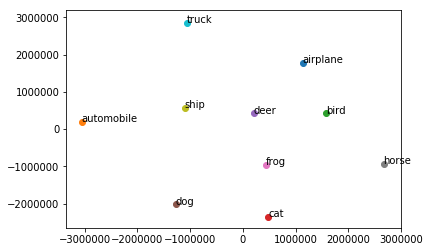

In [81]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist_classes)
xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, labels):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()